In [1]:
import matplotlib.pyplot as plt
from pandas.io.sql import read_sql
from pyiem.util import get_dbconn

pgconn = get_dbconn("postgis")
cursor = pgconn.cursor()
df = read_sql(
    """
 with bz as (
     select w.wfo, w.ugc, geom, issue, expire from warnings w JOIN ugcs u on (w.gid = u.gid)
     where phenomena = 'BZ' and significance = 'W'),
 svto as (
     SELECT phenomena, wfo, geom, issue, expire, eventid from sbw where 
     phenomena in ('TO','SV')  and significance = 'W' and issue > '2005-10-01'
     and status = 'NEW')

 SELECT bz.ugc, bz.issue as bzissue, bz.expire as bzexpire,
 svto.issue as wissue, svto.expire as wexpire, svto.phenomena as wtype, svto.eventid as weventid,
 bz.wfo
 from bz, svto WHERE 
 svto.wfo = bz.wfo and ST_Intersects(bz.geom, svto.geom) and svto.expire > bz.issue and 
 svto.issue < bz.expire ORDER by bz.issue ASC
""",
    pgconn,
    index_col=None,
)

/tmp/ipykernel_101573/3212631606.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = read_sql(


In [2]:
df

,ugc,bzissue,bzexpire,wissue,wexpire,wtype,weventid,wfo
0,MTZ037,2006-04-18 22:47:00+00:00,2006-04-20 02:30:00+00:00,2006-04-17 22:31:00+00:00,2006-05-19 23:03:00+00:00,SV,1,BYZ
1,NEZ019,2008-05-02 14:26:00+00:00,2008-05-03 00:20:00+00:00,2008-04-24 19:30:00+00:00,2008-05-07 22:38:00+00:00,SV,10,CYS
2,NEZ005,2009-03-23 18:00:00+00:00,2009-03-24 18:23:00+00:00,2009-03-23 18:53:00+00:00,2009-03-23 19:32:00+00:00,TO,1,LBF
3,NEZ005,2009-03-23 18:00:00+00:00,2009-03-24 18:23:00+00:00,2009-03-23 19:21:00+00:00,2009-03-23 20:00:00+00:00,SV,3,LBF
4,NEZ094,2009-03-23 18:00:00+00:00,2009-03-24 18:23:00+00:00,2009-03-23 18:37:00+00:00,2009-03-23 19:15:00+00:00,SV,1,LBF
5,NEZ005,2009-03-23 18:00:00+00:00,2009-03-24 18:23:00+00:00,2009-03-23 18:37:00+00:00,2009-03-23 19:15:00+00:00,SV,1,LBF
6,NEZ094,2009-03-23 18:00:00+00:00,2009-03-24 18:23:00+00:00,2009-03-23 18:53:00+00:00,2009-03-23 19:32:00+00:00,TO,1,LBF
7,OKZ007,2009-03-27 12:00:00+00:00,2009-03-28 18:00:00+00:00,2009-03-27 14:09:00+00:00,2009-03-27 14:45:00+00:00,SV,69,OUN
8,OKZ012,2009-03-27 12:00:00+00:00,2009-03-28 18:00:00+00:00,2009-03-27 14:09:00+00:00,2009-03-27 14:45:00+00:00,SV,69,OUN
9,AZZ033,2010-01-22 06:00:00+00:00,2010-01-22 18:00:00+00:00,2010-01-22 05:33:00+00:00,2010-01-22 06:30:00+00:00,SV,4,TWC


/tmp/ipykernel_101573/3482715805.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b = ax.set_yticklabels(ylabels)


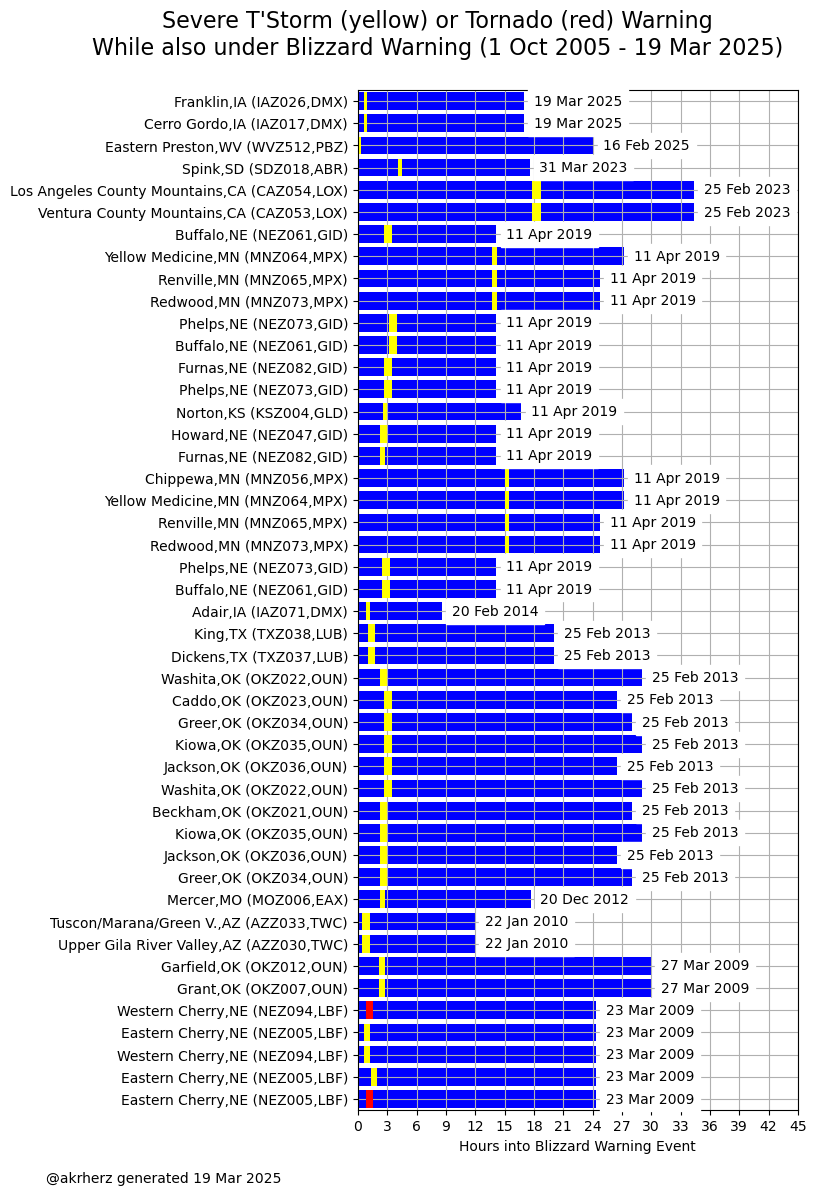

In [3]:
(fig, ax) = plt.subplots(1, 1, figsize=(8, 12))
ylabels = []
yticks = []
j = 0
colors = {"SV": "yellow", "TO": "red"}
for i, row in df.iterrows():
    sz = (df["bzexpire"][i] - df["bzissue"][i]).days * 86400.0 + (
        df["bzexpire"][i] - df["bzissue"][i]
    ).seconds
    offset2 = (df["wissue"][i] - df["bzissue"][i]).days * 86400.0 + (
        df["wissue"][i] - df["bzissue"][i]
    ).seconds
    if offset2 < 0:
        continue
    ax.barh(j, sz, color="b", zorder=1)
    ax.text(
        sz + 3600,
        j,
        "%s" % (df["wexpire"][i].strftime("%-d %b %Y"),),
        va="center",
        bbox=dict(color="white"),
    )
    cursor.execute(
        """SELECT name ||','||state from ugcs where ugc = %s LIMIT 1""",
        (df["ugc"][i],),
    )
    name = cursor.fetchone()[0]
    if row["ugc"] == "AZZ033":
        name = "Tuscon/Marana/Green V.,AZ"
    ylabels.append("%s (%s,%s)" % (name, row["ugc"], row["wfo"]))
    sz = (df["wexpire"][i] - df["wissue"][i]).days * 86400.0 + (
        df["wexpire"][i] - df["wissue"][i]
    ).seconds
    # print row, sz, offset2
    ax.barh(j, sz, left=offset2, facecolor=colors[df["wtype"][i]], zorder=2)
    yticks.append(j)
    j += 1

b = ax.set_yticklabels(ylabels)
a = ax.set_yticks(yticks)
ax.set_position([0.4, 0.07, 0.55, 0.85])
ax.set_ylim(-0.5, len(ylabels) - 0.5)
ax.set_xticks(range(0, 10800 * 15 + 1, 10800))
ax.set_xticklabels(range(0, 46, 3))
ax.grid(True)
ax.set_xlabel("Hours into Blizzard Warning Event")
fig.text(
    0.5,
    0.95,
    (
        "Severe T'Storm (yellow) or Tornado (red) Warning\n"
        "While also under Blizzard Warning (1 Oct 2005 - 19 Mar 2025)"
    ),
    fontsize=16,
    ha="center",
)
fig.text(0.01, 0.01, "@akrherz generated 19 Mar 2025")
fig.savefig("bz_svto.png")